<a href="https://colab.research.google.com/github/Sun-Joong/aifh/blob/master/Tensorflow_2_0_Tutorial_RNN_Korean_text_generation_character_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 텐서플로우 첫걸음
## Tensorflow 2.0 Sample Code
### RNN

이 샘플 코드는 Tensorflow 2.0 에서 RNN 을 간단하게 살펴보기 위한 용도로 만들어졌습니다. 

이 코드는 텐서플로우 공식 홈페이지에 있는 [Text generation using a RNN with eager execution](<https://www.tensorflow.org/tutorials/sequences/text_generation?hl=ko>)의 [colab버전](<https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/sequences/text_generation.ipynb?hl=ko>)을 참조했습니다.

이 코드에서는 한국 힙합 노래 가사 11,937 곡의 데이터를 이용해서 새로운 노래 가사를 생성해봅니다.

## 초기 환경 세팅

In [ ]:
# 텐서플로우 2.0 을 설치합니다.
!pip install tensorflow-gpu==2.0.0-alpha0

# 텐서플로우를 python 에 import 합니다.
import tensorflow as tf

# 텐서플로우의 버전을 확인해봅니다.
print(tf.__version__)

# numpy 를 np 라는 이름으로 축약해서 import 합니다.
import numpy as np

     |████████████████████████████████| 332.1MB 61kB/s 
     |████████████████████████████████| 3.0MB 35.3MB/s 
     |████████████████████████████████| 419kB 43.4MB/s 
     |████████████████████████████████| 61kB 27.8MB/s 
2.0.0-alpha0


## 데이터 다운로드 및 데이터 확인

In [ ]:
# bugs music 에서 다운로드한 11,000 여곡의 한국 힙합 노래 가사 데이터를 불러옵니다.
# 이 데이터는 연구용으로 제작되었으며 무단 전재 및 재배포를 금합니다.
path_to_file = tf.keras.utils.get_file('input.txt', 'https://raw.githubusercontent.com/greentec/greentec.github.io/master/public/other/data/koreanhiphop/input.txt')

22921216/22919747 [==============================] - 0s 0us/step


In [ ]:
# 데이터를 불러옵니다. encoding 형식으로 utf-8 을 지정해야합니다.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# 빠른 테스트를 위해 데이터 크기를 1/5 로 줄이는 옵션입니다. 
# 더 큰 크기로 테스트하면 더 좋은 결과가 나오겠지만 epoch 당 학습 시간이 많이 필요합니다.
# text = text[:len(text)//5]
# 텍스트가 총 몇 자인지 확인합니다.
print ('Length of text: {} characters'.format(len(text)))

Length of text: 11685293 characters


In [ ]:
# 처음 500 자를 확인해봅니다.
print(text[:500])

Pass me the ball cuz I make it 100
I know ya ain't got no d
Ain't nobody can stop me
From scoring scoring (swish)
Want more and more (swish)
The more I hear that sound the hotter
I get and you know it
81 in one game
너넨 못해 이런거
I'm just sayin you know
상처받았다면 I'm sorry
I'm black mamba that's all
Killer instinct man that's all
너네가 못하는게 아냐
I'm just better than y'all
Fast like bugatti
I get my shot in all the time
I do never doubt it
누가 붙든 간에 I know you can't stop me
So either quintuple team me or jus


## jamotools 설치 및 테스트

한글은 초성, 중성, 종성으로 구성되어 있기 때문에 각 글자를 자모로 분할하여 데이터로 넣는 것이 분할하지 않는 것보다 메모리 관리 측면에서 훨씬 효율적입니다. 

아래 셀에서는 자모 분할, 합치기 작업을 도와주는 [jamotools](<https://github.com/HaebinShin/jamotools>) 라는 라이브러리를 설치합니다.

In [ ]:
# jamotools 를 설치합니다.
!pip install jamotools

In [ ]:
# jamotools 를 사용하기 위해 import 합니다.
import jamotools
# 한글과 영어가 같이 있는 부분을 임의로 발췌했습니다.
s = text[3008:3092]
print(s)
print()
# 한글 텍스트를 자모 단위로 분리해줍니다. 영어에는 영향이 없습니다.
s_split = jamotools.split_syllables(s)
print(s_split)

니 생각을 매일해
Hot news처럼 걸렸어
내 life의 메인에
실검 1위 맨 위에
널 찾아 해메이네
아예 추가해놨어
내 즐겨찾기 page에 yeah

ㄴㅣ ㅅㅐㅇㄱㅏㄱㅇㅡㄹ ㅁㅐㅇㅣㄹㅎㅐ
Hot newsㅊㅓㄹㅓㅁ ㄱㅓㄹㄹㅕㅆㅇㅓ
ㄴㅐ lifeㅇㅢ ㅁㅔㅇㅣㄴㅇㅔ
ㅅㅣㄹㄱㅓㅁ 1ㅇㅟ ㅁㅐㄴ ㅇㅟㅇㅔ
ㄴㅓㄹ ㅊㅏㅈㅇㅏ ㅎㅐㅁㅔㅇㅣㄴㅔ
ㅇㅏㅇㅖ ㅊㅜㄱㅏㅎㅐㄴㅘㅆㅇㅓ
ㄴㅐ ㅈㅡㄹㄱㅕㅊㅏㅈㄱㅣ pageㅇㅔ yeah


In [ ]:
# jamotools 에서 분리했던 자모를 다시 합치는 기능을 테스트해봅니다.
s2 = jamotools.join_jamos(s_split)
print(s2)
print(s == s2)

니 생각을 매일해
Hot news처럼 걸렸어
내 life의 메인에
실검 1위 맨 위에
널 찾아 해메이네
아예 추가해놨어
내 즐겨찾기 page에 yeah
True


## 텍스트 전처리

jamotool 를 활용해서 korean hiphop 데이터를 자모 단위로 나누고, RNN 학습에 적합하도록 전처리하는 과정입니다.

In [ ]:
# 텍스트를 자모 단위로 나눕니다. 데이터가 크기 때문에 약간 시간이 걸립니다.
text_jamo = jamotools.split_syllables(text)
# 자모 단위 텍스트에 존재하는 unique character 를 set 을 이용해서 뽑아내고, sorted 로 정렬합니다.
# 이 unique charater 를 보통 vocabulary 라고 합니다.
vocab = sorted(set(text_jamo))
print ('{} unique characters'.format(len(vocab)))

1108 unique characters


텍스트를 RNN 에 입력하기 위해서는 숫자로 mapping 해야 합니다. 

character 를 number 로 맵핑해서 input data 를 만들고, number 를 character 로 맵핑하는 데이터를 만들어서 output data 를 해석합니다.

In [ ]:
# vocab character 를 숫자로 맵핑하고, 반대도 실행합니다.
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text_jamo])

In [ ]:
# char2idx 의 일부를 알아보기 쉽게 print 해봅니다.
print('{')
for char,_ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '"' :   3,
  '#' :   4,
  '$' :   5,
  '%' :   6,
  '&' :   7,
  "'" :   8,
  '(' :   9,
  ')' :  10,
  '*' :  11,
  '+' :  12,
  ',' :  13,
  '-' :  14,
  '.' :  15,
  '/' :  16,
  '0' :  17,
  '1' :  18,
  '2' :  19,
  ...
}


In [ ]:
# 자모 단위 텍스트의 숫자로 잘 맵핑되었는지 확인해봅니다.
print ('{} ---- characters mapped to int ---- > {}'.format(repr(text_jamo[210:233]), text_as_int[210:233]))

' game\nㄴㅓㄴㅔㄴ ㅁㅗㅅㅎㅐ ㅇㅣㄹㅓㄴ' ---- characters mapped to int ---- > [  1  72  66  78  70   0 354 385 354 386 354   1 367 389 371 380 382   1
 373 401 359 385 354]


## Dataset 만들기

딥러닝 학습을 위해서 batch 단위로 묶인 dataset 을 만들어야 합니다.

In [ ]:
# The maximum length sentence we want for a single input in characters
seq_length = 100
examples_per_epoch = len(text_jamo)//seq_length

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
  print(idx2char[i.numpy()])

P
a
s
s
 


In [ ]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(5):
  print(repr(''.join(idx2char[item.numpy()])))

"Pass me the ball cuz I make it 100\nI know ya ain't got no d\nAin't nobody can stop me\nFrom scoring sco"
'ring (swish)\nWant more and more (swish)\nThe more I hear that sound the hotter\nI get and you know it\n8'
"1 in one game\nㄴㅓㄴㅔㄴ ㅁㅗㅅㅎㅐ ㅇㅣㄹㅓㄴㄱㅓ\nI'm just sayin you know\nㅅㅏㅇㅊㅓㅂㅏㄷㅇㅏㅆㄷㅏㅁㅕㄴ I'm sorry\nI'm black mamba "
"that's all\nKiller instinct man that's all\nㄴㅓㄴㅔㄱㅏ ㅁㅗㅅㅎㅏㄴㅡㄴㄱㅔ ㅇㅏㄴㅑ\nI'm just better than y'all\nFast like"
" bugatti\nI get my shot in all the time\nI do never doubt it\nㄴㅜㄱㅏ ㅂㅜㅌㄷㅡㄴ ㄱㅏㄴㅇㅔ I know you can't stop me"


In [ ]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [ ]:
for input_example, target_example in  dataset.take(1):
  print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))

Input data:  "Pass me the ball cuz I make it 100\nI know ya ain't got no d\nAin't nobody can stop me\nFrom scoring sc"
Target data: "ass me the ball cuz I make it 100\nI know ya ain't got no d\nAin't nobody can stop me\nFrom scoring sco"


In [ ]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print("Step {:4d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

Step    0
  input: 49 ('P')
  expected output: 66 ('a')
Step    1
  input: 66 ('a')
  expected output: 84 ('s')
Step    2
  input: 84 ('s')
  expected output: 84 ('s')
Step    3
  input: 84 ('s')
  expected output: 1 (' ')
Step    4
  input: 1 (' ')
  expected output: 78 ('m')


In [ ]:
# Batch size
BATCH_SIZE = 64
steps_per_epoch = examples_per_epoch//BATCH_SIZE

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

## tf.keras 를 이용한 딥러닝 학습

In [ ]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(vocab), embedding_dim,
                              batch_input_shape=[BATCH_SIZE, None]),
    tf.keras.layers.GRU(rnn_units,
        return_sequences=True,
        recurrent_initializer='glorot_uniform',
        stateful=True),
    tf.keras.layers.Dense(vocab_size)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (64, None, 256)           283648    
_________________________________________________________________
unified_gru (UnifiedGRU)     (64, None, 1024)          3938304   
_________________________________________________________________
dense (Dense)                (64, None, 1108)          1135700   
Total params: 5,357,652
Trainable params: 5,357,652
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
  example_batch_predictions = model(input_example_batch)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 1108) # (batch_size, sequence_length, vocab_size)


In [ ]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

In [ ]:
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = loss)

In [ ]:
import os
# 모델의 체크포인트가 저장될 디렉토리 이름입니다.
checkpoint_dir = './training_checkpoints'

# 체크포인트 파일은 아래에서 지정하는 ckpt_{epoch} 형태로 접두사를 달게 됩니다. 즉 ckpt_5, ckpt_10, ... 이 됩니다.
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

# 체크포인트 콜백은 model.fit 을 실행할 때 호출됩니다. period 는 저장 주기입니다.
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True,
    period=1)

In [ ]:
EPOCHS = 20

In [ ]:
# 모델을 실제로 학습시킵니다.
# 진행 막대를 표시하지 않기 위해서 verbose=2 로 설정합니다. (0 = 표시없음, 1 = 진행막대 표시)
history = model.fit(dataset.repeat(), epochs=EPOCHS, steps_per_epoch=steps_per_epoch, callbacks=[checkpoint_callback], verbose=2)

Epoch 1/20
3078/3078 - 223s - loss: 1.6251
Epoch 2/20
3078/3078 - 221s - loss: 1.4974
Epoch 3/20
3078/3078 - 221s - loss: 1.4577
Epoch 4/20
3078/3078 - 221s - loss: 1.4388
Epoch 5/20
3078/3078 - 221s - loss: 1.4300
Epoch 6/20
3078/3078 - 221s - loss: 1.4262
Epoch 7/20
3078/3078 - 221s - loss: 1.4265
Epoch 8/20
3078/3078 - 221s - loss: 1.4298
Epoch 9/20
3078/3078 - 221s - loss: 1.4388
Epoch 10/20
3078/3078 - 221s - loss: 1.4567
Epoch 11/20
3078/3078 - 220s - loss: 2.0399
Epoch 12/20
3078/3078 - 221s - loss: 2.0144
Epoch 13/20
3078/3078 - 220s - loss: 1.9211
Epoch 14/20
3078/3078 - 220s - loss: 1.7866
Epoch 15/20
3078/3078 - 220s - loss: 1.6841
Epoch 16/20
3078/3078 - 220s - loss: 1.6283
Epoch 17/20
3078/3078 - 220s - loss: 1.5924
Epoch 18/20
3078/3078 - 220s - loss: 1.5706
Epoch 19/20
3078/3078 - 220s - loss: 1.5581
Epoch 20/20
3078/3078 - 220s - loss: 1.5575


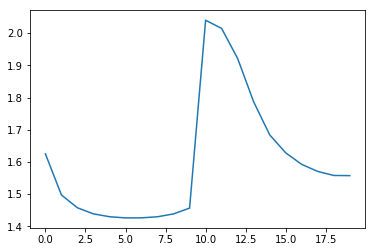

In [ ]:
# 학습 결과 시각화를 위해 matplotlib.pyplot 모듈을 plt 라는 이름으로 축약해서 import 합니다.
import matplotlib.pyplot as plt

# 위에서 history 라는 이름으로 저장했던 변수에 있는 loss 정보를 꺾은선 그래프로 그립니다.
plt.plot(history.history['loss'])

# plt.show() 함수를 호출해야 위에서 그린 그래프가 출력에 나타납니다.
plt.show()

In [ ]:
# 가장 최신의 체크포인트 파일 이름을 출력합니다.
tf.train.latest_checkpoint(checkpoint_dir)

'./training_checkpoints/ckpt_20'

In [ ]:
# 텍스트 생성을 위해서 위와 네트워크 구조가 동일하지만 batch_size 가 1인 모델을 만듭니다. 
gen_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(vocab), embedding_dim,
                              batch_input_shape=[1, None]),
    tf.keras.layers.GRU(rnn_units,
        return_sequences=True,
        recurrent_initializer='glorot_uniform',
        stateful=True),
    tf.keras.layers.Dense(vocab_size)
])

# 최신의 체크포인트에서 weights 를 불러옵니다.
gen_model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

# 가장 loss 가 낮은 weights 를 불러옵니다.
min_loss = min(history.history['loss'])
index = history.history['loss'].index(min_loss)
print(min_loss, index)
gen_model.load_weights('./training_checkpoints/ckpt_' + str(index+1))

# build() 함수로 모델을 사용할 수 있도록 만듭니다. build() 함수를 사용할 때는 인수로 input_shape 을 같이 써줘야 합니다.
gen_model.build(tf.TensorShape([1, None]))

# gen_model의 구조를 출력합니다.
gen_model.summary()

1.4262497359626551 5
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (1, None, 256)            283648    
_________________________________________________________________
unified_gru_1 (UnifiedGRU)   (1, None, 1024)           3938304   
_________________________________________________________________
dense_1 (Dense)              (1, None, 1108)           1135700   
Total params: 5,357,652
Trainable params: 5,357,652
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 1000

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated_jamo = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
      predictions = tf.squeeze(predictions, 0)

      # using a multinomial distribution to predict the word returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted word as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated_jamo.append(idx2char[predicted_id])
      
  text_generated = jamotools.join_jamos(''.join(text_generated_jamo))

  return (jamotools.join_jamos(start_string) + text_generated)

In [ ]:
# print(generate_text(gen_model, start_string=u"ㄴㅐㄱㅏ ㅈㅔㅇㅣㄹ "))
print(generate_text(gen_model, start_string=u"ㅈㅏㅁㅇㅡㄴ ㅇㅏㄴㅇㅗㄱㅗ "))
# print(generate_text(gen_model, start_string=u"ㅇㅗㄴㅡㄹ ㅂㅏㅁㅇㅡㄴ "))

잠은 안오고 선수들은 교폼
먼지 위에 있니 추억이 날 위해 이 순간이
생명은 그리워 가고 있는 이게 yee
마시라'MMIN STILK AY 이미 간고식 
배기 부는 이유 
From 콘콜 통화 매번 날아가
teken is better than the perfect
to my tody 최면에 입고 앉아 with ya 보이니까 모두 boss by 휘과저 회계
너넨 빨감한 위치
뭔가 변해
니 번째로 행복한 일상
난 잘 알고 있을 줄과 복
어릴 때 몇 년 쪽
음악 그 속에 뒤토를 지세상으로 하나없어 술도 
산이 될 못 참고 인기는 사랑해 오늘은 hey
너는
hit me ur new if piece
Lookin so baur 녹아
133 느껴봐 나는 도착 온 되는 자존감옷
유사 받아있던 우리 인생은 krayou
가로주를 모르는 인생

fan-nation ask with a supacconts
얼리너 약간 한 것만 같애 
이제꺼고플 빨리 가서내려
가뭄에 올라가게 뛰나봐
신이 되기 많아 잠마 있어 최로운 걸)

어쩌면 그래 우리 사이는 안 보이는 체대로 색깔
돈을 쫌 건드려 누가 신경섬 없이 빡빡주의 바다로
이미 끝까지 휩을 떠올려줘
그도 난 너를 사렁알자 빠지
